# Importing data analysis Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.core.pylabtools import figsize
plt.style.use('seaborn')

C:\Users\btr\AppData\Local\Temp\ipykernel_11536\3268240982.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Reading profiles and risk data

In [2]:
profiles = pd.read_csv("profiles.csv",sep=',',lineterminator='\n')
risk = pd.read_csv("risk.csv",sep=',',lineterminator='\n')
profiles = profiles.rename(columns={"MET (activity level)": "MET"})
profiles.describe()



,Unnamed: 0,ID,BMI,Heart rate data used,MET
count,233.000000,233.000000,233.000000,233.000000,233.000000
mean,116.000000,117.000000,27.057882,0.626609,17.247569
std,67.405489,67.405489,16.843256,0.484746,18.175526
min,0.000000,1.000000,3.596908,0.000000,0.145333
25%,58.000000,59.000000,22.913774,0.000000,5.404917
50%,116.000000,117.000000,24.913495,1.000000,11.886912
75%,174.000000,175.000000,28.507522,1.000000,22.805854
max,232.000000,233.000000,270.416441,1.000000,117.923590


In [3]:
risk.describe()

,Unnamed: 0,ID,risk
count,1246.000000,1246.000000,1246.000000
mean,1022.631621,117.998395,0.261203
std,569.481052,67.051428,0.197880
min,0.000000,1.000000,0.000200
25%,437.250000,61.000000,0.108200
50%,1050.000000,117.500000,0.218950
75%,1549.750000,175.000000,0.349300
max,1863.000000,233.000000,1.000000


# converting object dyptes

In [126]:
profiles['Age'] = profiles['Age'].str.replace(',', '.') #Cleaning the age value
profiles["Sex"] = profiles["Sex"].astype('category')
profiles["Smoking"] = profiles["Smoking"].astype('category')
profiles["Age"] = profiles["Age"].astype('float64')

# Function for plotting categorical variables

In [128]:
def plot_feature(df, target, col): 
    categories = df[col].value_counts().index.to_list()
    n_categories = len(categories)
    if n_categories < 20 or df[col].dtype != 'int64':
        print(df[col].value_counts())
    
    plt.figure(figsize = (16,12))
    if df[col].dtype == 'int64':
        plt.subplot(2,1,1)
        if n_categories < 30:
            sns.distplot(df[col], bins = n_categories)
        else:
            sns.distplot(df[col], bins = 25)           
        plt.subplot(2,1,2)
        sns.lineplot(x = col, y = target, data = df)
    else:
        if n_categories < 20:
            plt.subplot(2,1,1)
            sns.countplot(x = col, data = df) 
            plt.subplot(2,1,2)
            sns.boxplot(x = col, y = target, data = df)
    plt.show()

no        152
former     62
yes        19
Name: Smoking, dtype: int64


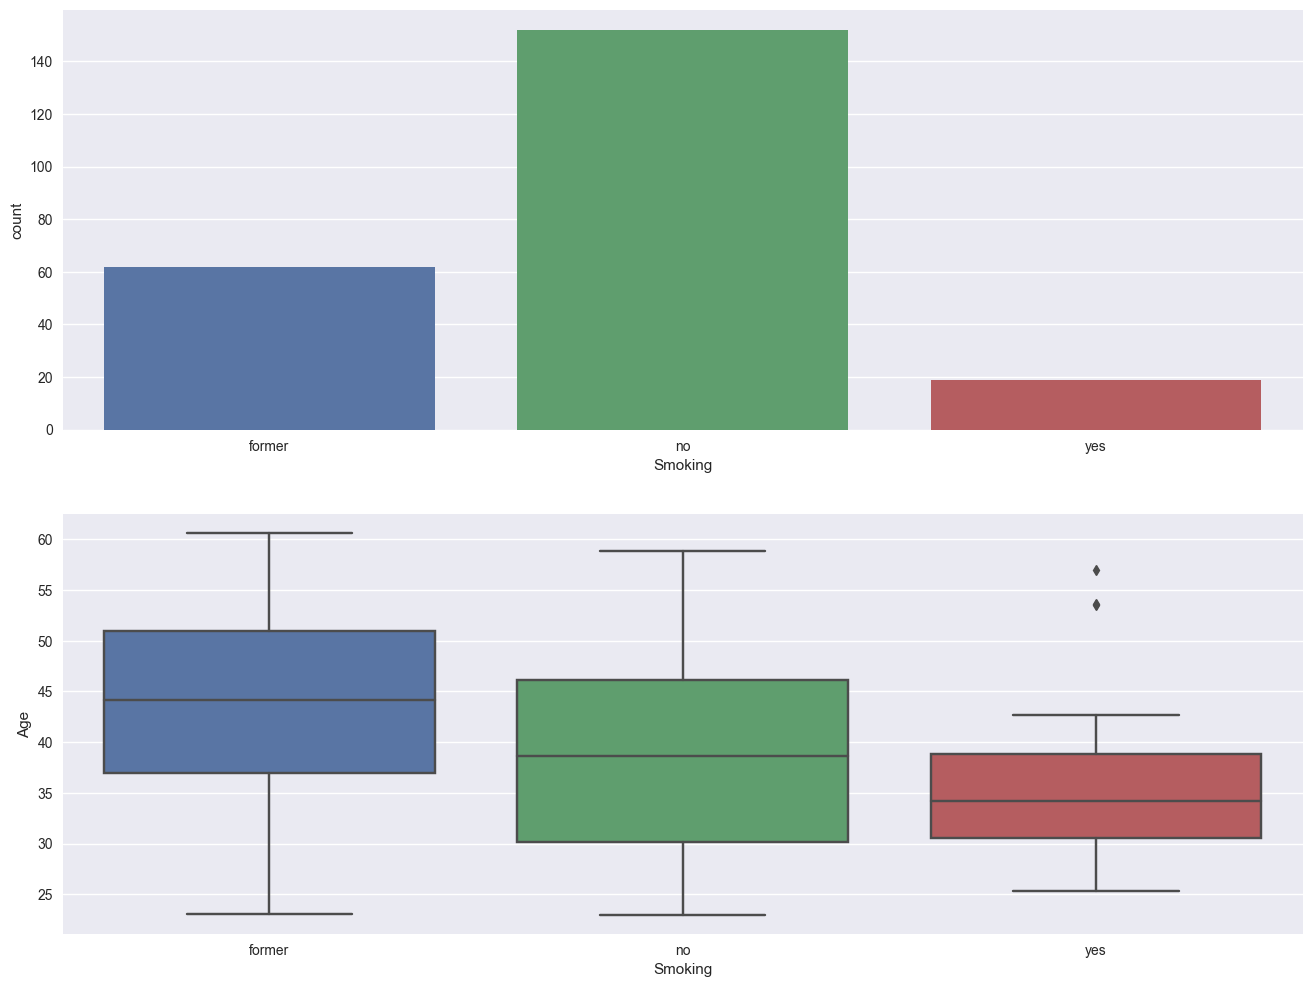

In [129]:
#checking smoking status age wise
plot_feature(profiles,"Age","Smoking")

F    128
M    105
Name: Sex, dtype: int64


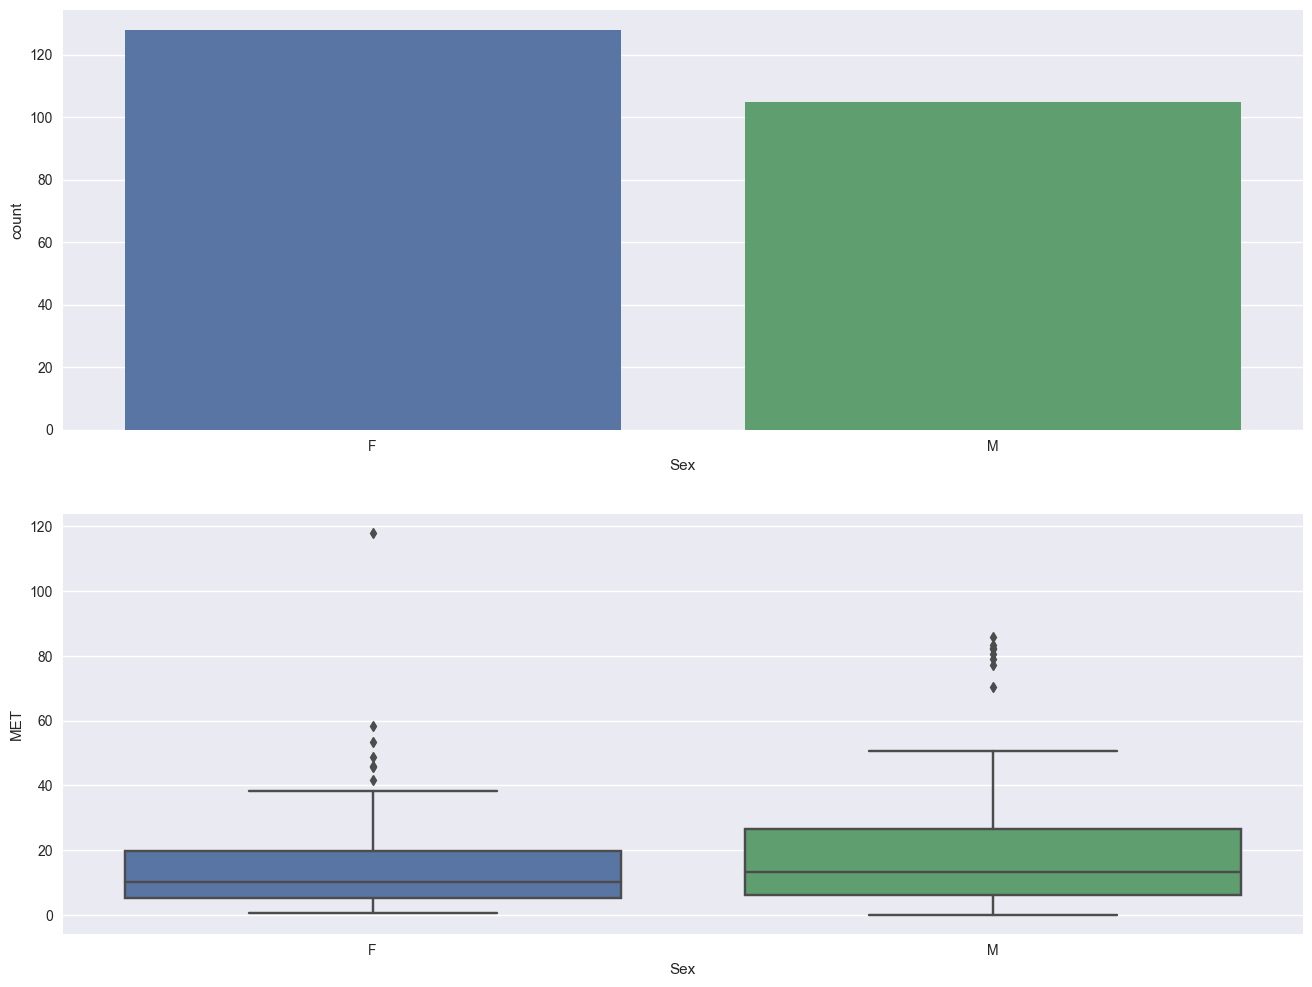

In [130]:
#Checking MET values Sex wise
plot_feature(profiles,"MET","Sex")

In [131]:
risk.head()

,Unnamed: 0,ID,Diseases,risk
0,0,1,Stroke,0.1362
1,5,6,Stroke,0.6855
2,10,11,Stroke,0.4033
3,11,12,Stroke,0.4148
4,22,23,Stroke,0.0929


# Checking null values

In [132]:
#to check null values
profiles.isna().sum()



Unnamed: 0              0
ID                      0
Sex                     0
Age                     0
Smoking                 0
BMI                     0
Heart rate data used    0
MET                     0
dtype: int64

# Checking the distribution of numerical variables



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



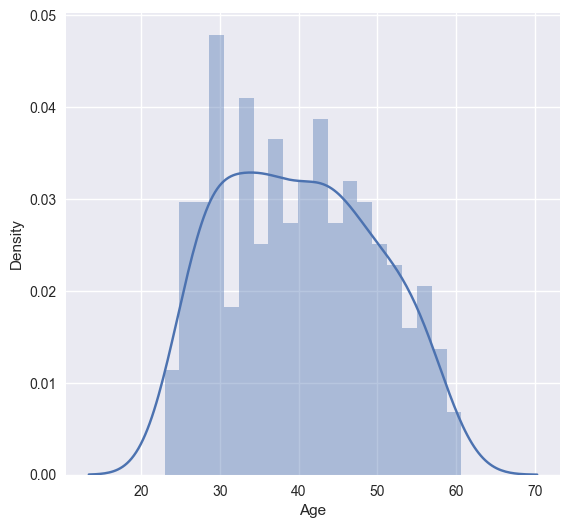

In [135]:
#Age distribution
plt.figure(figsize = (14,6))
plt.subplot(1, 2, 2)
sns.distplot(profiles.Age, bins = 20)
plt.show()



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



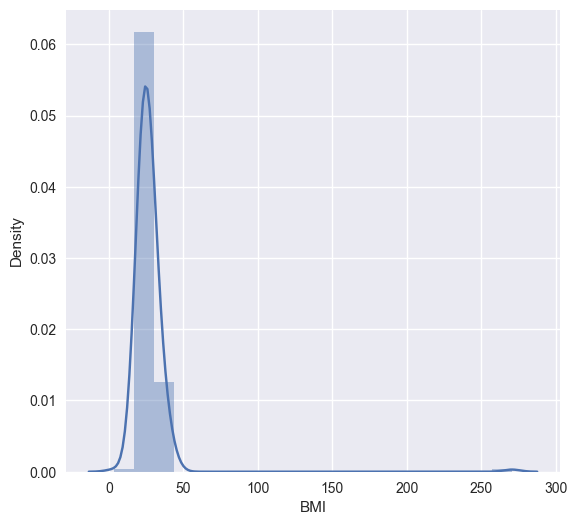

In [136]:
#BMI distribution
plt.figure(figsize = (14,6))
plt.subplot(1, 2, 2)
sns.distplot(profiles.BMI, bins = 20)
plt.show()



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



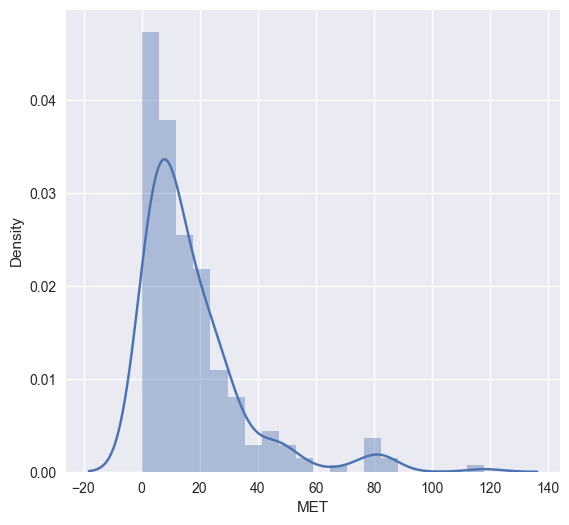

In [137]:
#MET distribution
plt.figure(figsize = (14,6))
plt.subplot(1, 2, 2)
sns.distplot(profiles.MET, bins = 20)
plt.show()

# Function to detect outliers

In [138]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [139]:
# Detecting  and removing outliers for MET and BMI variables
outliers_met_candidates = list(find_outliers_IQR(profiles["MET"]))
outliers_bmi_candidates = list(find_outliers_IQR(profiles["BMI"]))
#
# remove outliers from profiles
print(outliers_met_candidates)
print(outliers_bmi_candidates)

[53.3916666666667, 50.7723491239678, 58.2895049852963, 80.6608469636389, 83.2841536127037, 79.08264845, 70.4490787037037, 82.1129815778449, 77.0568226806065, 82.3577800369722, 117.923590134083, 85.7755150784861]
[40.1233315753175, 39.3525092295834, 38.5411172867053, 38.1039475689681, 41.0301729579599, 37.8962746530314, 38.3031695872833, 42.2010191169933, 3.59690844233056, 40.1701323251418, 37.0982552800735, 41.5111111111111, 270.416441319632, 37.5617283950617]


In [140]:
#from the outliers and after checking from the internet, I found that MET>50 is highly impossible and also BMI 270 also not possible
outliers_met = outliers_met_candidates
outliers_bmi = [270.416441319632]

In [141]:
#remove outliers
print(profiles.shape)
profiles = profiles[~profiles["MET"].isin(outliers_met)]
profiles = profiles[~profiles["BMI"].isin(outliers_bmi)]
print(profiles.shape)

(233, 8)
(220, 8)


In [142]:
risk["Diseases"].value_counts()
#plot_feature(, 'salary','jobType')

Fatty Liver                232
Alcoholic Liver Disease    232
Heart Disease              232
Bowel Cancer               207
Kidney Disease             130
Stroke                     108
Lung cancer                 57
Breast Cancer               48
Name: Diseases, dtype: int64

In [103]:
#Use only cancer disease data
risk_cancer = risk[risk["Diseases"].isin(["Bowel Cancer","Lung cancer","Breast Cancer"])]
risk_cancer_grp = risk_cancer.groupby('ID').agg(risk_sum=('risk', 'sum'))
#risk_cancer_grp contains risk_sum for each patient ID

In [143]:
#checking the outliers for the risk_sum variable..it looks fine
risk_cancer_grp.describe()

,risk_sum
count,212.000000
mean,0.585535
std,0.368274
min,0.001500
25%,0.318900
50%,0.488700
75%,0.781575
max,2.439100


# Join Profiles and risk data

In [144]:

profiles_risk = pd.merge(profiles, risk_cancer_grp, on='ID', how='inner')
#risk_cancer["Diseases"].value_counts()

# Check cancer wise patient count

209
{'Bowel Cancer': 206, 'Lung cancer': 54, 'Breast Cancer': 46}


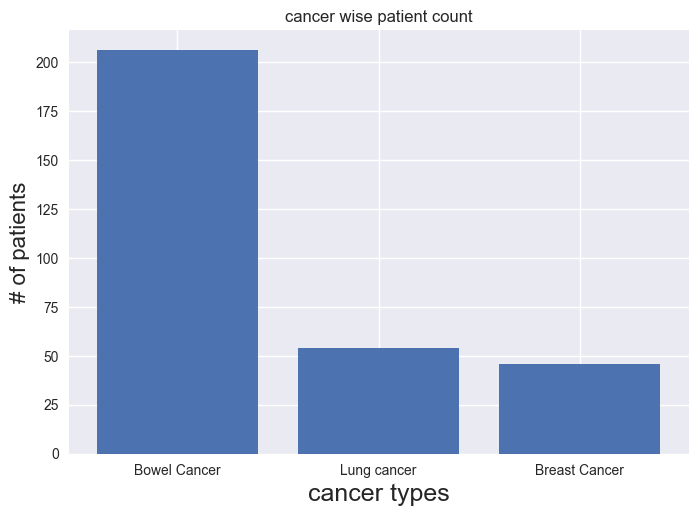

In [145]:
user_ids = list(profiles_risk['ID'].unique())
print(len(user_ids))
cancer_types = dict(risk_cancer[risk_cancer["ID"].isin(user_ids)]["Diseases"].value_counts())
print(cancer_types)
plt.bar(range(3), list(cancer_types.values()), tick_label=list(cancer_types.keys()))
plt.title('cancer wise patient count')
plt.xlabel('cancer types', fontsize=18)
plt.ylabel('# of patients', fontsize=16)
plt.show()

F    120
M     89
Name: Sex, dtype: int64


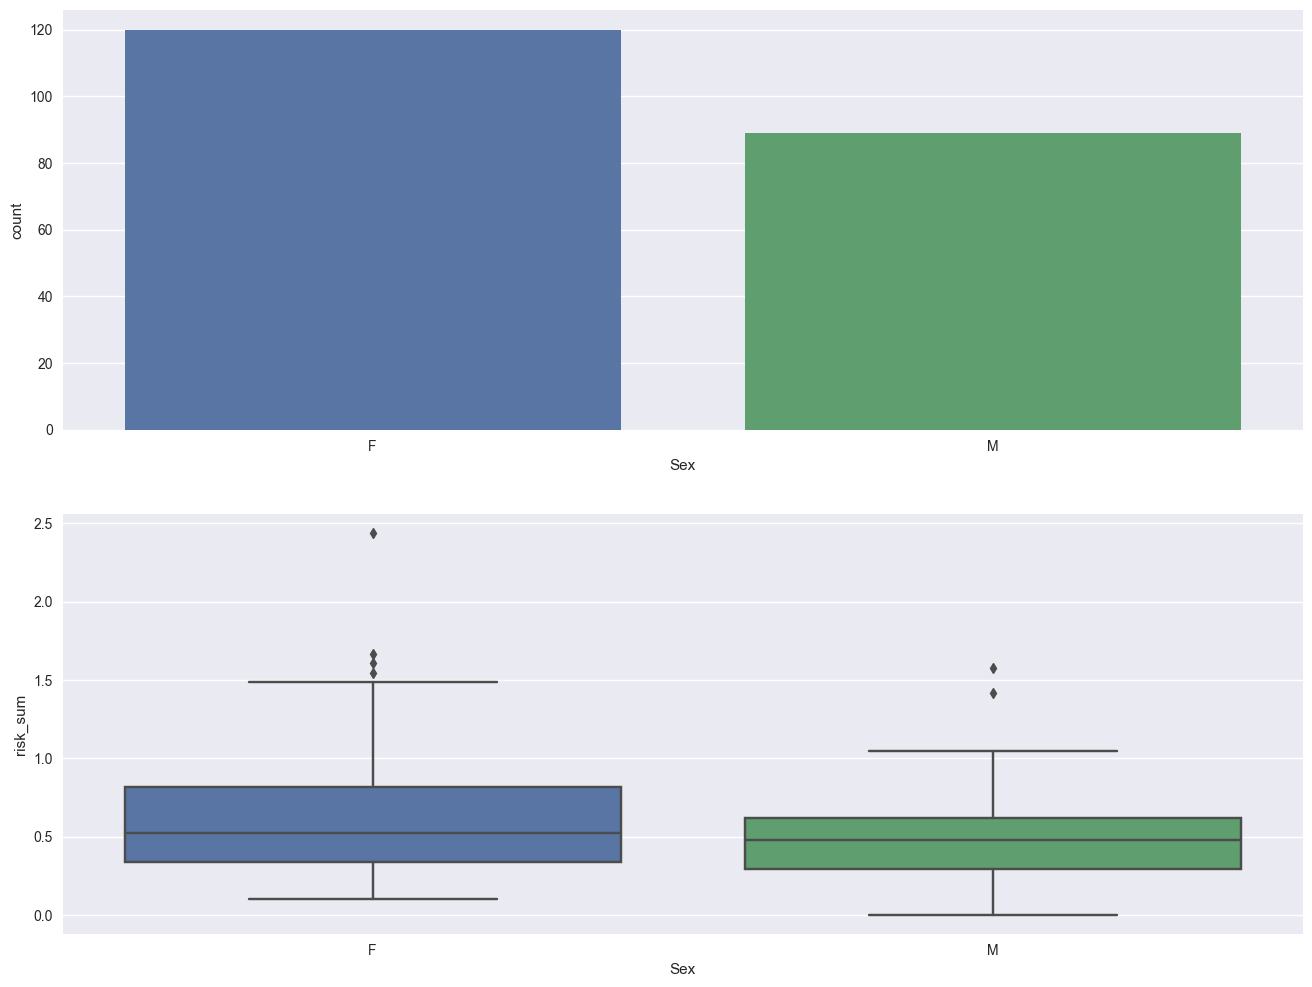

In [146]:
plot_feature(profiles_risk, 'risk_sum','Sex')

no        133
former     59
yes        17
Name: Smoking, dtype: int64


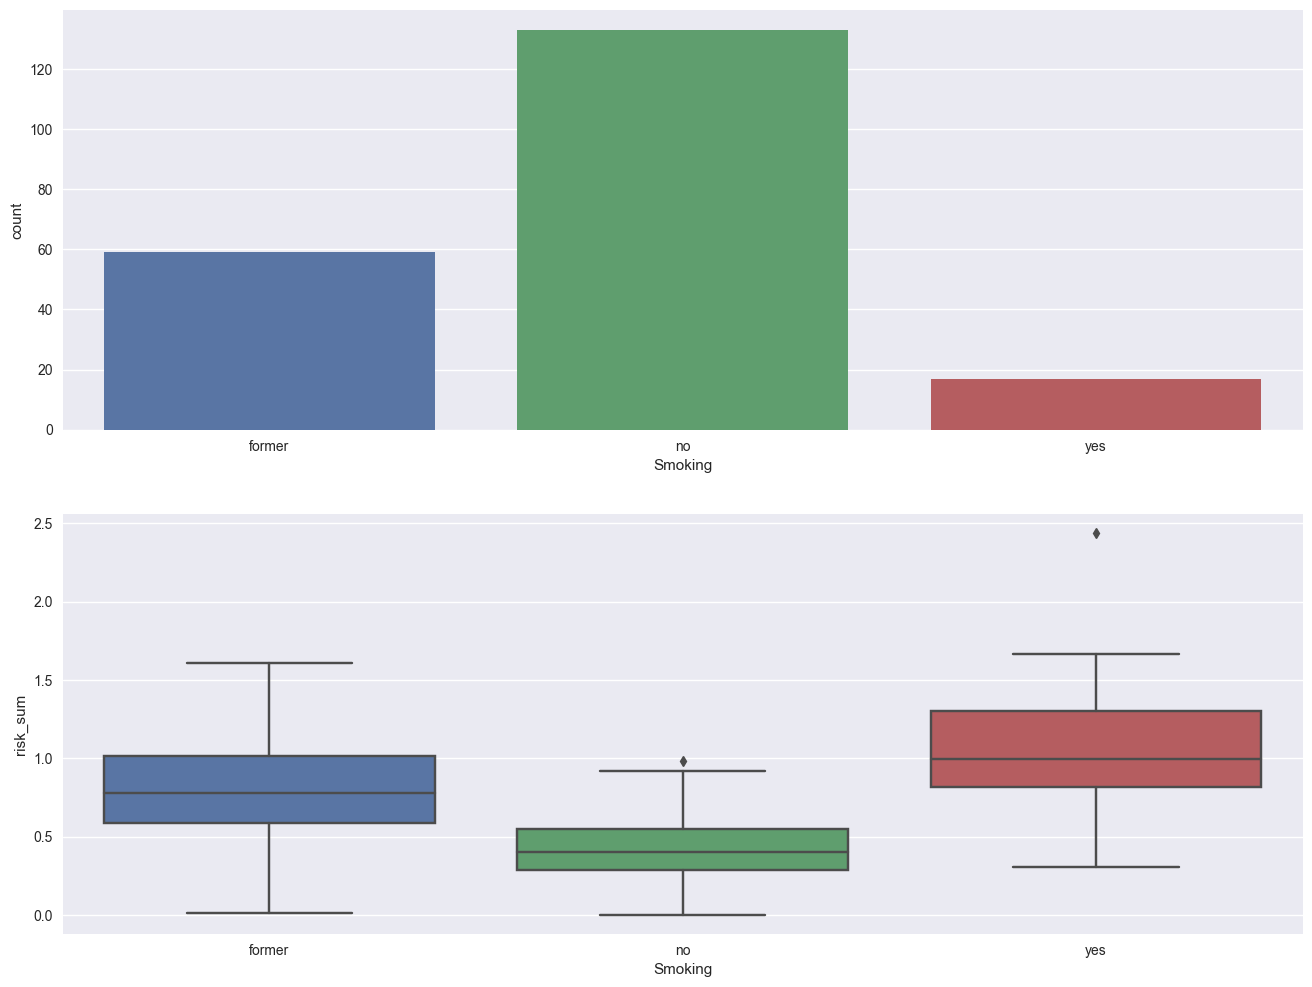

In [147]:
plot_feature(profiles_risk, 'risk_sum','Smoking')

In [148]:
plot_feature(profiles_risk, 'risk_sum','Age')

30.143541    2
29.178401    2
45.785373    2
44.667122    1
28.467532    1
            ..
52.374573    1
53.615858    1
57.987697    1
44.801094    1
40.421053    1
Name: Age, Length: 206, dtype: int64


<Figure size 1600x1200 with 0 Axes>

In [68]:
#profiles_risk = profiles_risk.drop(columns = ['Unnamed:0','Unnamed: 0_y'])
profiles_risk.head()

,Unnamed: 0,ID,Sex,Age,Smoking,BMI,Heart rate data used,MET,risk_sum
0,0,1,F,44.667122,no,20.136249,1.0,16.812778,0.1869
1,1,2,F,37.222146,no,28.731747,1.0,11.625394,0.4718
2,3,4,F,25.331511,yes,22.939751,0.0,12.570449,1.1196
3,4,5,F,37.101846,former,28.507522,0.0,30.080823,0.2582
4,5,6,F,56.194122,former,40.123332,0.0,2.706019,1.4796


In [71]:
profiles_risk.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            212 non-null    int64   
 1   ID                    212 non-null    int64   
 2   Sex                   212 non-null    category
 3   Age                   212 non-null    float64 
 4   Smoking               212 non-null    category
 5   BMI                   212 non-null    float64 
 6   Heart rate data used  212 non-null    float64 
 7   MET                   212 non-null    float64 
 8   risk_sum              212 non-null    float64 
dtypes: category(2), float64(5), int64(2)
memory usage: 13.9 KB


# Convert categorical variable to 1-hot encoding 

In [9]:
num_feat_li = ["Age","BMI","Heart rate data used","MET"]
cat_feat_li = ["Sex","Smoking"]
cat_feats = profiles_risk[cat_feat_li]
num_feats = profiles_risk[num_feat_li]
cat_feats = pd.get_dummies(cat_feats, drop_first=True)
features = pd.concat([num_feats, cat_feats], axis = 1)
y = profiles_risk["risk_sum"]

# Import ML Libraries

In [10]:
from sklearn.model_selection import train_test_split

#Imputing missing values and scaling values
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

#ML
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


# Split into train and val set

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(features, 
                                      y, 
                                      test_size = 0.20, 
                                      random_state = 1)

# Function to calculate RMSE

In [12]:
import math
def get_rmse(y_true, y_pred):
    return math.sqrt(abs(np.square(np.subtract(y_true,y_pred)).mean()))

# Function to scale numerical variables

In [13]:
from sklearn.preprocessing import MinMaxScaler
def scaler(X):
    scale = MinMaxScaler()
    X_scaled = X.copy()
    colnames = X_scaled.select_dtypes(include=['float64','int64']).columns.to_list()
    #colnames.remove("salary") #salary is target variable
    print('\nThe following columns are scaled:\n')
    print(colnames)
    scale.fit(X_scaled[colnames])
    X_scaled[colnames] =  scale.transform(X_scaled[colnames])
    return X_scaled

In [14]:
X_train_scaled = scaler(X_train)
X_val_scaled = scaler(X_val)


The following columns are scaled:

['Age', 'BMI', 'Heart rate data used', 'MET']

The following columns are scaled:

['Age', 'BMI', 'Heart rate data used', 'MET']


# Function to evaluate the model

In [15]:
import time
def evaluate_model(model,model_name):
    start = time.time()
    if model_name=="lr":
        model.fit(X_train_scaled,Y_train)
    else:
        model.fit(X_train,Y_train)
    if model_name=="lr":
        Y_pred = model.predict(X_val_scaled)
    else:
        Y_pred = model.predict(X_val)
    Y_pred = Y_pred.reshape(Y_val.shape)
    rmse = get_rmse(Y_val, Y_pred)
    end = time.time()
    total_time = end-start
    print('Time taken: %0.2f' %(total_time), 's.')
    return rmse,total_time

# Define different models

In [16]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators = 100, n_jobs = 4, max_depth = 20, min_samples_split = 70,
                          max_features = 8, verbose = 0)
gbr = GradientBoostingRegressor(n_estimators = 50, max_depth = 8, loss = 'ls', verbose = 0)
lgbm = LGBMRegressor(random_state = 1)
xgb = XGBRegressor(random_state = 1)
catb = CatBoostRegressor(random_state = 1, 
                                verbose=False,
                                task_type='CPU')

models = [lr,rf,gbr,lgbm,xgb,catb]
model_names = ["lr","Random Forest","Gradient Boosting","Light GBM","XGBoost","CatBooost"]
model_rmse = {}
model_time = {}


# evaluate each model and get RMSE

In [17]:
for i,model in enumerate(models):
      rmse,time_1 = evaluate_model(model,model_names[i])
      model_rmse[model_names[i]]=rmse
      model_time[model_names[i]] = time_1
      print(model_names[i]+' Root Mean Squared Error: '+str(rmse), '\n')

Time taken: 0.01 s.
lr Root Mean Squared Error: 0.29697412887557645 

Time taken: 0.23 s.
Random Forest Root Mean Squared Error: 0.2571376229149413 

Time taken: 0.05 s.
Gradient Boosting Root Mean Squared Error: 0.17100971485973646 

Time taken: 0.04 s.
Light GBM Root Mean Squared Error: 0.16793902632682858 



The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.


Time taken: 0.17 s.
XGBoost Root Mean Squared Error: 0.1721655584929865 



iteritems is deprecated and will be removed in a future version. Use .items instead.


Time taken: 2.46 s.
CatBooost Root Mean Squared Error: 0.08087017342090234 



# Code for compare different models

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


Text(0.5, 1.0, 'Model Comparison on Test RMSE')

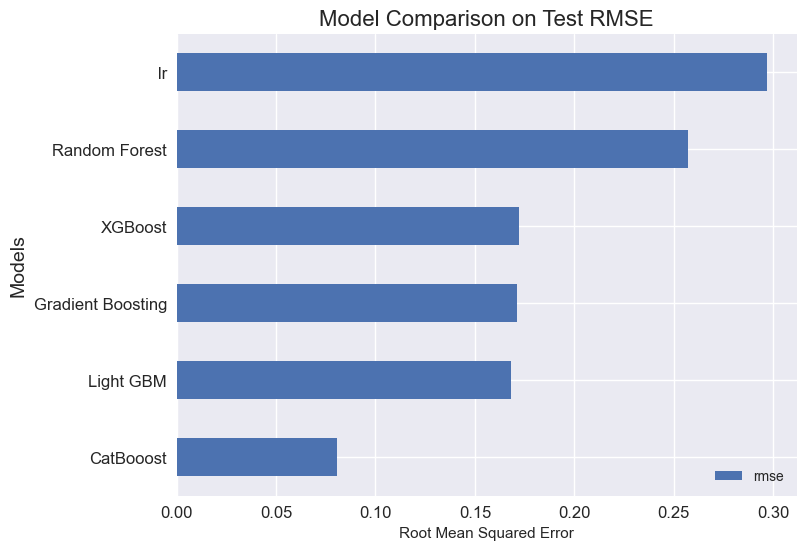

In [18]:
from optparse import Values


plt.style.use('seaborn')
figsize(8, 6)

model_comparison = pd.DataFrame({'model':model_rmse.keys(),'rmse':model_rmse.values()})
model_comparison.sort_values('rmse', ascending = True).plot(x = 'model', 
                                                           y = 'rmse', 
                                                           kind = 'barh')
plt.ylabel('Models', size = 14)
plt.yticks(size = 12)
plt.xlabel('Root Mean Squared Error')
plt.xticks(size = 12)
plt.title('Model Comparison on Test RMSE', size = 16)

# Shap for feature importance

In [36]:
import shap
explainer = shap.TreeExplainer(catb)
shap_values = explainer(X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


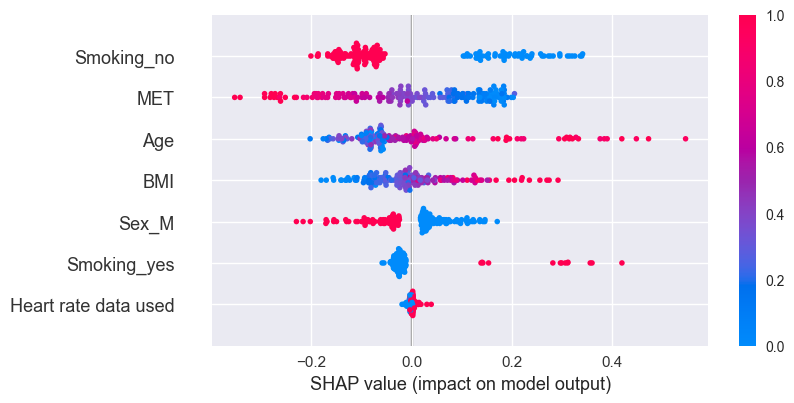

In [37]:
#shap.summary_plot(shap_values, X_train)
shap.plots.beeswarm(shap_values, show=False, color_bar=False)
plt.colorbar()
plt.show()

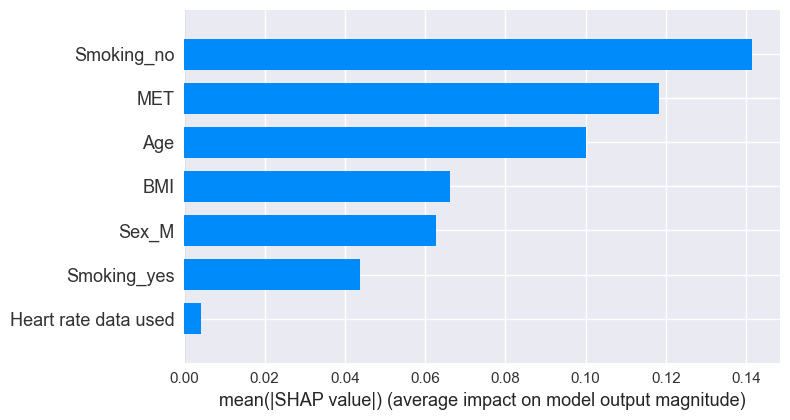

In [50]:
shap.summary_plot(shap_values, X_train, plot_type='bar')
